# 밀도 기반 군집화 with DBSCAN
---
- DBSCAN 등의 밀도 기반 군집화 기법은 `군집에 속하지 않은 샘플`은 이상치로 간주한다.
- DBSCAN에서는 eps(epsilon) 이라 부르는 '중심점' 이있고, 해당 중심점을 기준으로 설정된 반경안에 들어온 샘플을 경계점이라 한다.
- 그리고 이 두가지에 어느곳에도 속하지 않는 샘플을 이상치로 판단한다.
---
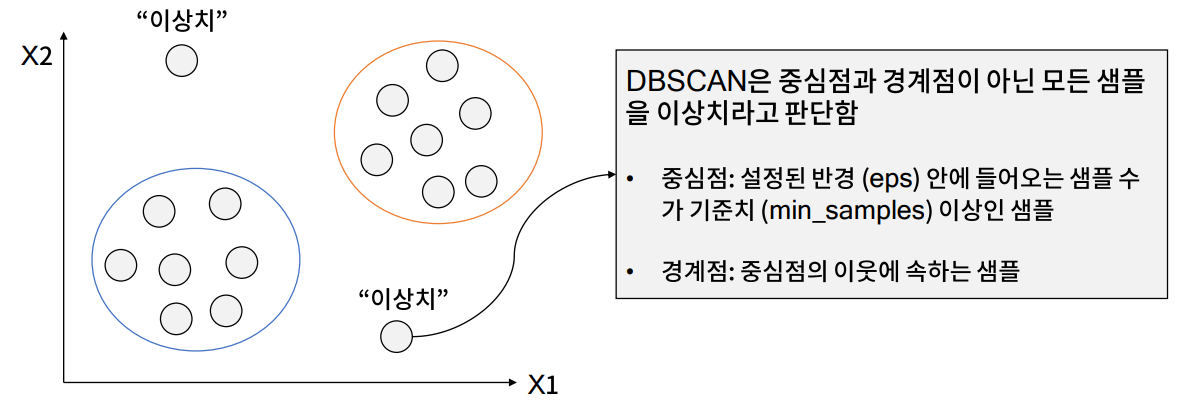

---
**장점**
- 다른 특징과의 관계까지 반영해서 이상치를 판단할 수 있다.

**단점**
- DBSCAN 등의 밀도 기반 군집화 모델은 파라미터 튜닝이 쉽지 않다는 단점이 있다.

# 관련 문법 : sklearn.cluster.DBSCAN
---
- DBSCAN 군집화를 수행하는 인스턴스를 생성하는 함수

**파라미터**

---
- eps : 이웃이라 판단하는 반경
- min_samples : 중심점이라 판단하기 위해, eps 내에 들어와야 하는 최소 샘플의 수
- metric : 사용할 거리 척도
---
**주요 attribute**
- .labels_ : 각 샘플이 속한 군집 정보 (-1 은 이상치를 의미)

In [1]:
import os
import pandas as pd
import numpy as np

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

실습용 예제 파일 로드

In [2]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Glass_type
0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
1,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
2,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,1
3,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,1
4,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.11,1


In [3]:
# 특징과 라벨 분리
X = df.drop(['Glass_type'], axis = 1)
Y = df['Glass_type']

In [4]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape

(160, 8)

# DBSCAN 으로 이상치 분류하기

In [5]:
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN

거리 행렬 생성

In [6]:
DM = cdist(Train_X, Train_X) # 거리 행렬 => DBSCAN의 파라미터 설정시 참고하기 위함
np.quantile(DM, 0.1) # 샘플 간 거리의 10% quantile계산 (작은 값을 기준으로 10%)

0.699409817247659

- 모든 샘플의 거리행렬에서 상위 10%가 0.699정도이다.
- 동일 데이터간의 거리행렬 -> 대다수의 거리값이 0이 나올 것 -> mean, max, min등을 사용하기에 적절하지 않음
---

- 계산한 거리행렬의 quantile(분포통계량) 값을 기준으로 eps값 설정
- 단, 위에서 계산한 quantiel 값은 참고만 하는값이다. 절대적으로 따라야 하는 값이 아니다.

## Trial_1

In [8]:
# 모델 인스턴스화 + fitting
cluster_model = DBSCAN(eps = 0.69, min_samples = 3).fit(Train_X)

# 이상치 탐색 
print(sum(cluster_model.labels_ == -1))

# 44개가 이상치로 판단 => 이정도면 너무 많은 양이 아닌가?? => 파라미터 조정 필요 (eps 증가)

44


## Trial_2

In [9]:
cluster_model = DBSCAN(eps = 2, min_samples = 3).fit(Train_X)
print(sum(cluster_model.labels_ == -1)) # 8개 -> 전체 160개의 약 10%미만의값 -> 괜찮은 양이라고 판단하여 삭제 수행

8


## 결측치 제거

In [10]:
# labels_가 -1인것(=이상치)만 제거
Train_X = Train_X[cluster_model.labels_ != -1]

In [11]:
Train_X.shape

(152, 8)